In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive if needed


Mounted at /content/drive


In [2]:
!pip install librosa matplotlib numpy tensorflow


In [3]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Set paths
data_path = '/content/drive/MyDrive/sounds'

# Load audio data and extract features
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3.0, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)  # Reduce dimensions by taking the mean
    return mfcc_scaled

labels = []
features = []

# Iterate over dataset folders (e.g., Ambulance, Firetruck, Traffic)
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(category_path, file_name)
                feature = extract_features(file_path)
                features.append(feature)
                labels.append(category)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode labels as integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Number of output classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5169 - loss: 0.9674 - val_accuracy: 0.9167 - val_loss: 0.4429
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9111 - loss: 0.3475 - val_accuracy: 0.9500 - val_loss: 0.1767
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9732 - loss: 0.1220 - val_accuracy: 0.9833 - val_loss: 0.0999
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9747 - loss: 0.0847 - val_accuracy: 0.9667 - val_loss: 0.0858
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9809 - loss: 0.0693 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9815 - loss: 0.0562 - val_accuracy: 0.9667 - val_loss: 0.0764
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0357 - val_accuracy: 0.9750 - val_loss: 0.0698
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9987 - loss: 0.0251 - val_accuracy: 0.9833 -

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9946 - loss: 0.0586     
Test Accuracy: 0.99


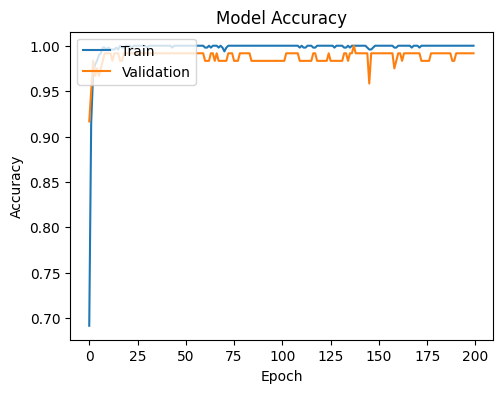

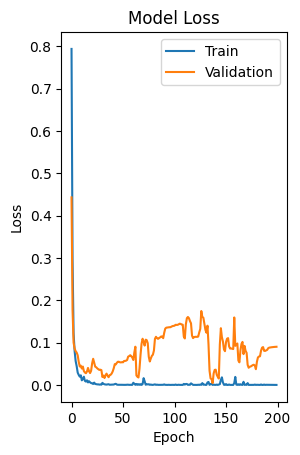

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [10]:
model.save('siren_sound_classifier.h5')
